## 전압 측정 예제(평균 필터)
전압의 평균 = 14.4V
잡음 = 평균 0, 표준편차 4
초당 1번의 데이터가 50초동안 들어옴
$$\bar x_k = \alpha \bar x_{k-1} + (1-\alpha)x_k$$

In [47]:
# 평균 필터 구현
def avg_filter(dataList):    

    avgList = []
    avg = 0
    k = 1
    for data in dataList:
        alpha = (k-1) / k
        avg = alpha * avg + (1-alpha)*data
        k+=1
        avgList.append(avg)
    return avgList

In [48]:
# 전압 데이터 생성
import numpy as np

def make_voltage_data(Nsamples):
    voltageData = []
    stdVolt = 14.4
    noise = np.random.normal(0, 4, Nsamples)
    for i in range(Nsamples):
        voltageData.append(stdVolt + noise[i])
    return voltageData

voltageData = make_voltage_data(50)

In [49]:
# 평균 필터를 이용하여 전압의 평균 측정
avgFilterData = avg_filter(voltageData)

Text(0, 0.5, 'Volt(V)')

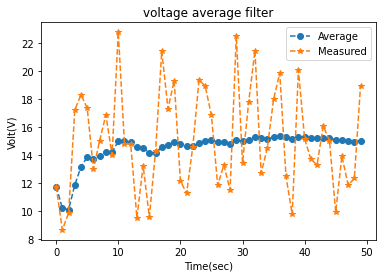

In [50]:
# 데이터 시각화
import matplotlib.pyplot as plt

plt.plot(avgFilterData, 'o--', label='Average')
plt.plot(voltageData, '*--', label = 'Measured')
plt.legend()
plt.title('voltage average filter')
plt.xlabel('Time(sec)')
plt.ylabel('Volt(V)')